<a href="https://colab.research.google.com/github/Kusuma-Bhargavi-Nadendla/Machine-Learning/blob/main/MLLab5_GradientDescent_Advertising.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings ('ignore')

sales_df =pd.read_csv('Advertising.csv')
# Printing first few records
sales_df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [ ]:
# For building a regression model, the inputs TV, radio, and newspaper are taken as X features
# and Sales Y is taken as the outcome variable.
X =sales_df[['TV', 'radio', 'newspaper']]
Y =sales_df['sales']

In [ ]:
# It is important to convert all variables into one scale.
# This can be done by subtracting mean from each value of the variable
# and dividing by the corresponding standard deviation of the variable.

Y= np.array( (Y-Y.mean()) / Y.std())
X= X.apply(lambda rec: (rec - rec.mean()) / rec.std(), axis =0)


In [ ]:
import random
#dim is the number of weights to be initialized besides the bias

def initialize(dim):
    # For reproducible results, the seed it set to 42.
    # Reader can comment the following two Lines
    # and try other initialiazation values.
    np.random.seed(seed=42)
    random.seed(42)
    #Initialize the bias.
    b = np.random.random()
    #Initialize the weights.
    w = np.random.rand(dim)
    return b, w

In [ ]:
# To initialize the bias and 3 weights, as we have three input variables TV, radio and newspaper, # we can invoke the initialize() method as follows:
b, w =initialize( 3 )
print("Bias: ", b, "Weights: ", w)

Bias:  0.3745401188473625 Weights:  [0.95071431 0.73199394 0.59865848]


In [ ]:
# Inputs:
#b - bias
#w weights
#X the input matrix
def predict_Y( b, w, X):
    return b + np.matmul( X, w)


In [ ]:
# Now calculate the predicted values after initializing bias and weights.
b, w =initialize(3)
Y_hat =predict_Y( b, w, X)
Y_hat[0:10]

0    3.073270
1    0.429497
2    1.117807
3    2.081321
4    0.899283
5    1.328275
6   -0.340765
7   -0.624364
8   -3.014357
9   -0.317171
dtype: float64

In [ ]:
import math
# Inputs
#Y- Actual values of y
#Y_hat predicted value of y

def get_cost(Y, Y_hat):
    # Calculating the residuals difference between actual and
    # predicted values
    Y_resid = Y - Y_hat
    # Matrix multiplication with self will give the square values
    # Then take the sum and divide by number of examples to
    # calculate mean

    return np.sum(np.matmul(Y_resid.T, Y_resid ) ) / len( Y_resid )

In [ ]:
# Invoking get_cost() after initializing the bias and weights # and calculating predicted values for outcome variable.
b, w =initialize(3)
Y_hat =predict_Y( b, w, X)
get_cost(Y, Y_hat )


0.7819614334235186

In [ ]:
#x, y: the input and output variables
#y_hat: predicted value with current bias and weights
#b_0, w_8: current bias and weights
#Learning rate: Learning rate to adjust the update step
def update_beta(x, y, y_hat, b_0, w_0, learning_rate):
    #gradient of bias
    db =(np.sum(y_hat - y) *2) / len(y)
    #gradient of weights
    dw =(np.dot((y_hat - y), x) * 2) / len(y)
    #update bias
    b_1 =b_0 - learning_rate * db
    #update beta
    w_1=w_0 - learning_rate * dw
    #return the new bias and beta values
    return b_1, w_1


In [ ]:
b, w =initialize(3)
print("After Initialization Bias: ", b, "Weights:", w)
Y_hat =predict_Y( b, w, X)
b, w =update_beta(X, Y, Y_hat, b, w, 0.01)
print("After first update - Bias:", b, "Weights: ", w)

After Initialization Bias:  0.3745401188473625 Weights: [0.95071431 0.73199394 0.59865848]
After first update - Bias: 0.3670493164704152 Weights:  [0.94588811 0.72363861 0.58505848]


In [ ]:
def run_gradient_descent(X,Y, alpha = 0.01, num_iterations=100):
    #Initialize the bias and weights
    b, w =initialize(X.shape[1])
    iter_num=0
    #gd_iterations of keeps track of the cost every 18 iterations
    gd_iterations_df= pd.DataFrame(columns=['iteration', 'cost'])
    result_idx=0
    #Run the iterations in Loop
    for each_iter in range(num_iterations):
        #Calculate predicted value of y
        Y_hat =predict_Y( b, w, X)
        #Calculate the cost
        this_cost= get_cost(Y, Y_hat )
        #Save the previous bias and weights
        prev_b=b
        prev_w=w
        #Update and calculate the new values of blas and weights
        b, w =update_beta(X, Y, Y_hat, prev_b, prev_w, alpha)
        #For every 10 iterations, store the cost le. MSE
        if( iter_num %100):
            gd_iterations_df.loc[result_idx] =[iter_num, this_cost]
            result_idx =result_idx+1
        iter_num+= 1
    print( "Final estimate of b and w:", b, w)
    #return the final bias, weights and the cost at the end
    return gd_iterations_df, b, w


In [ ]:
gd_iterations_df, b, w =run_gradient_descent(X, Y, alpha=  0.001, num_iterations= 200)
gd_iterations_df[0:10]

Final estimate of b and w: 0.2509612110432311 [0.87460376 0.60911449 0.3832586 ]


,iteration,cost
0,1.0,0.778624
1,2.0,0.775303
2,3.0,0.772000
3,4.0,0.768713
4,5.0,0.765442
5,6.0,0.762189
6,7.0,0.758952
7,8.0,0.755731
8,9.0,0.752526
9,10.0,0.749338


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

Text(0, 0.5, 'Cost or MSE')

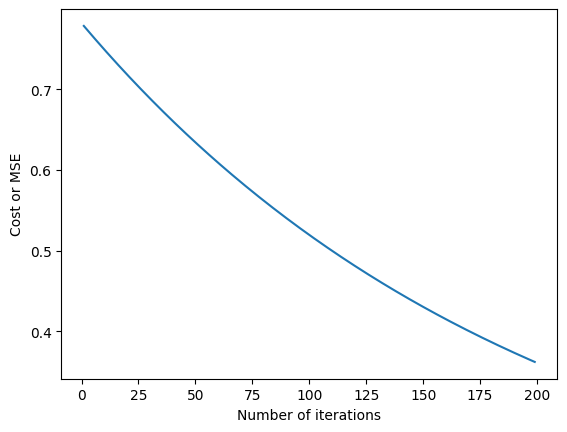

In [ ]:
plt.plot(gd_iterations_df['iteration'], gd_iterations_df['cost'])
plt.xlabel("Number of iterations")
plt.ylabel("Cost or MSE")

In [ ]:
print("Final estimates of b and w:" , b, w)

Final estimates of b and w: 0.2509612110432311 [0.87460376 0.60911449 0.3832586 ]


Final estimate of b and w: -4.6707626453932285e-17 [ 0.75306591  0.53648155 -0.00433069]
Final estimate of b and w: 0.006832520111367672 [0.75500561 0.52246826 0.01272503]


Text(0.5, 1.0, 'cost Vs Iterations for different alpha values')

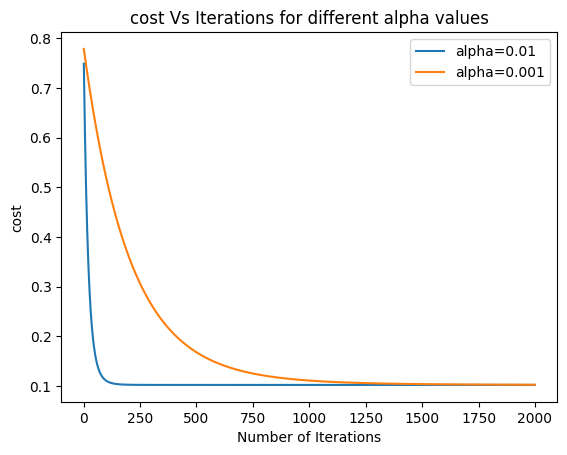

In [ ]:
alpha_df_1, b, w=run_gradient_descent(X, Y, alpha=0.01, num_iterations=2000)


alpha_df_2, b, w=run_gradient_descent(X, Y, alpha=0.001, num_iterations=2000)


plt.plot( alpha_df_1['iteration'], alpha_df_1['cost'], label='alpha=0.01' )
plt.plot( alpha_df_2['iteration'], alpha_df_2['cost'], label='alpha=0.001' )
plt.legend()
plt.ylabel('cost');
plt.xlabel('Number of Iterations')
plt.title('cost Vs Iterations for different alpha values')

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
sales_df[["TV", "radio","newspaper"]],
sales_df.sales,
test_size=0.3,
random_state=42)


In [ ]:
len(X_train)

140

In [ ]:
len(X_test)

60

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
#Initialize the model
linreg=LinearRegression()
#Fitting training data to the model
linreg.fit(X_train, y_train)


LinearRegression()

In [ ]:
linreg.intercept_

2.7089490925159065

In [ ]:
linreg.coef_

array([0.04405928, 0.1992875 , 0.00688245])

In [ ]:
list(zip(["TV","radio","newspaper"],list(linreg.coef_)))


[('TV', 0.04405928095746522),
 ('radio', 0.19928749689893954),
 ('newspaper', 0.006882452222275487)]

In [ ]:
#predicting the y value from the test set
y_pred=linreg.predict(X_test)


test_pred_df=pd.DataFrame({'actual':y_test,
'predicted':np.round(y_pred,2),
'residuals':y_test - y_pred })
test_pred_df.sample(10)

,actual,predicted,residuals
117,9.4,6.34,3.063632
170,8.4,7.35,1.049715
95,16.9,16.57,0.334604
195,7.6,5.22,2.375645
115,12.6,13.36,-0.755569
38,10.1,10.17,-0.070454
56,5.5,8.92,-3.415494
165,11.9,14.30,-2.402060
173,11.7,11.63,0.068431
9,10.6,12.18,-1.576049


In [ ]:

#importing metrics from sklearn
from sklearn import metrics

r2=metrics.r2_score(y_train, linreg.predict(X_train))
print("R Squared:", r2)

#y_pred contains predicted value of test data
mse=metrics.mean_squared_error(y_test, y_pred)

#Taking square root of the MSE and then round off to two decimal values
rmse=round(np.sqrt(mse),2)
print("RMSE:", rmse)

R Squared: 0.9055159502227753
RMSE: 1.95
